In [ ]:
pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import scikitplot as skplt
import os
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Accuracy Score
# Confusion Matrix
# Classification Report


#import methods
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from gtts import gTTS
from googletrans import Translator

In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
colnames=['ID', 'Text data', 'Label']
df1=pd.read_csv("/content/drive/MyDrive/codalab/hate.csv",names=colnames,header=0)
df2=pd.read_csv("/content/drive/MyDrive/codalab/nohate (1).csv",names=colnames,header=0)
df3=pd.read_csv("/content/drive/MyDrive/codalab/suba.csv",names=colnames,header=0)
df1.append(df2)


<ipython-input-5-1a341d036ea0>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,ID,Text data,Label
0,17587,BNO BNO News NEWS @BNONews PARADOK3713 Ukrai...,1
1,71849,IUraid Euctilglbd? Tuas,1
2,50104,RUSSIA INVADED UKRAINE CDDDYZH Imoilid CC,1
3,86020,Putin trains his Actually it's more like sol...,1
4,94772,"""This is a war of choice. It's Putin's choic...",1
...,...,...,...
1671,58167,NATO 0 @NATO All women and girls must live f...,0
1672,37498,LATEST PICTURES PUTIN CALLS EASTERN UKRAINE ...,0
1673,62097,UKRAINE-RUSSIA CRISIS UPDATE PHILIPPINE STAR,0
1674,34698,IAM NOT UKRAINIAN BUT I SUPPORT YOU,0


In [ ]:
df=pd.DataFrame()
for i in range(len(df1)):
        df = df.append(df1.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)


<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-23647f5dfde5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1.loc[i])
<ipython-input-6-236

In [ ]:
for i in range(len(df3)):
        df = df.append(df3.loc[i])

# Reset the index of the updated DataFrame
df.reset_index(drop=True, inplace=True)

<ipython-input-7-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-7-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-7-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-7-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-7-38d0a779c3b3>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df3.loc[i])
<ipython-input-7-38d

In [ ]:
train_set, test_set= train_test_split(df, test_size = 0.20, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(1908, 3)
(477, 3)

The Trainset consists of 1908 records and 3 features

The Testset consists of 477 records and 3 features


In [ ]:
print(train_set['Label'],train_set['ID'])

275     1
2107    1
1406    1
360     1
1711    1
       ..
1638    1
1095    1
1130    1
1294    1
860     1
Name: Label, Length: 1908, dtype: int64 275     83413
2107    70284
1406    14135
360     72874
1711    81787
        ...  
1638    85193
1095    56267
1130    82231
1294    46347
860     19564
Name: ID, Length: 1908, dtype: int64


In [ ]:
import joblib
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set['Text data'])
joblib.dump(countvect, "countvectorizer.pkl")
# preparing for training set
x_train_df = countvect.transform(train_set['Text data'])

# preparing for test set
x_test_df = countvect.transform(test_set['Text data'])




The accuracy of Naive Bayes clasifier is 92.87211740041928%

 [[  6  34]
 [  0 437]]


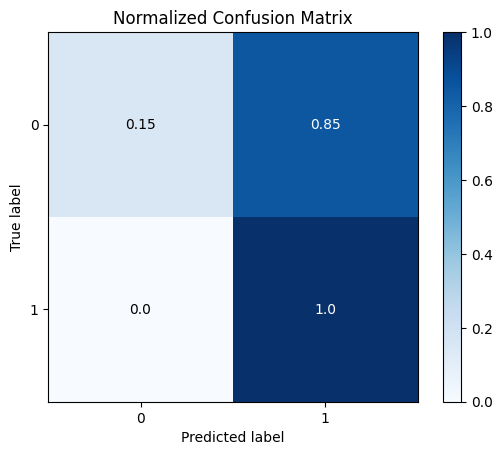

['model.pkl']

In [ ]:
import joblib
clf = MultinomialNB()
clf.fit(x_train_df,train_set['Label'])
predicted_values_NB = clf.predict(x_test_df)
predictions = dict()
accuracy = accuracy_score(test_set['Label'], predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set['Label'], predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)
skplt.metrics.plot_confusion_matrix(test_set['Label'], predicted_values_NB, normalize = True)
plt.show()
joblib.dump(clf, "model.pkl")

In [ ]:
from sklearn.metrics import classification_report
y_true = test_set.Label
y_pred = predicted_values_NB
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.15      0.26        40
     class 1       0.93      1.00      0.96       437

    accuracy                           0.93       477
   macro avg       0.96      0.57      0.61       477
weighted avg       0.93      0.93      0.90       477



In [ ]:
from sklearn import svm
import joblib
d_f=pd.read_csv("/content/drive/MyDrive/codalab/testa.csv")

countvect = joblib.load("countvectorizer.pkl")
# Create a placeholder column with default values
transform=countvect.transform(d_f['TEXT DATA'])

# Load the saved model
clf = joblib.load("model.pkl")

# Use the model to make predictions
predictions = clf.predict(transform)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
for i in range(len(d_f)):
  if predictions[i]==0:
    d_f['LABEL'][i]='0'
  elif predictions[i]==1:
    d_f['LABEL'][i]='1'

<ipython-input-32-2faf21be9719>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_f['LABEL'][i]='1'


In [ ]:
d_f.to_csv('outputa.csv', index=False)

In [ ]:
#d_f.to_excel('/content/output.xlsx', index=False)

In [ ]:
import pandas as pd
d_f=pd.read_csv('outputa.csv')
df1=pd.DataFrame()
df1['index']=d_f['ID']
df1['prediction']=d_f['LABEL']
df_sorted = df1.sort_values("index")



In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with columns 'index' and 'prediction'

# Convert DataFrame to JSON
json_data = df_sorted.to_json(orient='records',lines=True)

# Save JSON data to a file
with open('predictions.json', 'w') as file:
    file.write(json_data)

In [ ]:
with open('df1.json', 'w') as f:
  f.write(df1.to_json())

In [ ]:


# Convert DataFrame to JSON
json_data = df1.to_json(orient='records',lines=True)

# Save JSON data to a file
with open('submission.json', 'w') as file:
    file.write(json_data)
